In [51]:
import sys
import numpy as np
import onnx
import onnx.helper as helper
from onnx import numpy_helper

layer = 'MobilenetV1/MobilenetV1/Conv2d_1_depthwise/BatchNorm/FusedBatchNorm:0'

onnx_model = onnx.load("mobilenet_v1_1.0_224.onnx")
graph = onnx_model.graph
node  = graph.node

model_infer = onnx.shape_inference.infer_shapes(onnx_model)

node_to_insert = 0
for i in range(len(node)):
    if layer == node[i].output[0]:
        node_to_insert = i
        break
else:
    print('not found')
    0/0

# for l in onnx_model.graph.initializer:
#     if l.name == node[node_to_insert].input[1]:
#         print(list(map(lambda x:x.astype('float64').astype('str'), numpy_helper.to_array(l)[1][1][1])))
#         break
        
for vi in model_infer.graph.value_info:
    if vi.name==node[node_to_insert].input[0]:
        print([x.dim_value for x in vi.type.tensor_type.shape.dim])
        break
for vi in model_infer.graph.value_info:
    if vi.name==node[node_to_insert].output[0]:
        print([x.dim_value for x in vi.type.tensor_type.shape.dim])
        break
        
for vi in model_infer.graph.value_info:
    if vi.name==layer:
        shape = [x.dim_value for x in vi.type.tensor_type.shape.dim]
        break
else:
    print('not found')
    0/0
prob_info = helper.make_tensor_value_info(layer, onnx.TensorProto.FLOAT, shape)
graph.output.insert(node_to_insert, prob_info)
onnx.save(onnx_model, 'mobilenet_v1_1.0_224_1.onnx')

import onnxruntime as rt
from PIL import Image

sess = rt.InferenceSession("mobilenet_v1_1.0_224_1.onnx")
img = Image.open('OIP.jpg')
in_arr = np.array(img, dtype=np.float32)
del img
in_arr = in_arr.transpose(2,0,1)
in_arr = (in_arr/255.-0.5)*2.0
in_arr = in_arr.reshape(1,3,224,224)
with open('img.dat', 'wb') as f:
    f.write(in_arr.tobytes())

# in_l = np.zeros((3, 225, 225), dtype=np.float32)
# out_l = np.zeros((32, 112, 112), dtype=np.float32)

# for l in onnx_model.graph.initializer:
#     if l.name == node[node_to_insert].input[1]:
# #         print(list(map(lambda x:x.astype('float64').astype('str'), numpy_helper.to_array(l)[1][1][1])))
#         weight = numpy_helper.to_array(l)
#     if l.name == node[node_to_insert].input[2]:
#         bias = numpy_helper.to_array(l)

# in_l[:,:-1,:-1] = in_arr

# for co in range(32):
#     out_l[co,:,:] = bias[co]
#     for x in range(112):
#         for y in range(112):
#             su = np.float64(bias[co])
#             for ci in range(3):
#                 for m in range(3):
#                     for n in range(3):
#                         su += np.float64(in_l[ci,x*2+m,y*2+n])*np.float64(weight[co,ci,m,n])
#             out_l[co,x,y] = su
                        
    
inputs = {sess.get_inputs()[0].name: in_arr}
out = sess.run([layer], inputs)
print('ok')

[0, 32, 112, 112]
[0, 32, 112, 112]
ok


In [119]:
o = out[0]
o = o.reshape(-1)
print(o.shape)

(401408,)


In [54]:
with open('export.dat', 'rb') as f:
    b = f.read()
    
a = np.frombuffer(b, dtype=np.float32)
# a1 = out_l.reshape(-1)
print(a.shape)
# print(np.sum(np.abs(a1-o))/a1.size)
print(np.sum(np.abs(a-o))/a.size)

(401408,)
5.679765973772321


(112, 112, 3)


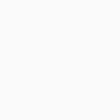

In [36]:
im = (a1!=o).astype(np.uint8)
# im += 1.0
im *= 250
im = im.reshape(32, 112, 112)
im = im[0:1,:,:]+np.zeros((3,112,112), dtype=np.uint8)
im = im.transpose(1,2,0)
print(im.shape)
img = Image.fromarray(np.uint8(im))
display(img)

In [47]:
o[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [48]:
a[:10]

array([-0., -0., -0., -0., -0., -0., -0., -0., -0., -0.], dtype=float32)

In [49]:
a[:100]-o[:100]

array([-0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0.], dtype=float32)

In [19]:
np.argmax(a1-o)

234630

In [144]:
B = np.array([
    -1.171126127243042,
    0.5819808840751648,
    0.6790149211883545,
    -0.42340219020843506,
    1.7030929327011108,
    0.9571624994277954,
    -0.8229854106903076,
    3.171541929244995,
    -0.8525885939598083,
    -0.78580641746521,
    -0.960985004901886,
    3.595393180847168,
    2.09940767288208,
    1.829443097114563,
    -0.44398707151412964,
    2.1895999908447266,
    0.16186827421188354,
    3.2713027000427246,
    0.4981716275215149,
    1.2559545040130615,
    -0.7746003866195679,
    4.413620948791504,
    -1.003190040588379,
    1.6349468231201172,
    0.19251137971878052,
    -3.006516695022583,
    1.3629865646362305,
    -0.9093892574310303,
    2.9020111560821533,
    -0.14252325892448425,
    -0.9508225321769714,
    4.262905120849609
], dtype=np.float64)
scale = np.array(
[
    -0.020057253539562225,
    1.523036241531372,
    0.29303574562072754,
    0.07929041236639023,
    0.9612151980400085,
    0.9468568563461304,
    0.940824568271637,
    0.6036416888237,
    0.055359844118356705,
    0.45270344614982605,
    0.19307057559490204,
    0.7964275479316711,
    0.3261885344982147,
    0.5713300108909607,
    -0.09445980191230774,
    1.6081569194793701,
    0.2527218759059906,
    0.6122488379478455,
    0.3796830475330353,
    1.0942178964614868,
    0.5041667819023132,
    0.4620940089225769,
    0.6963729858398438,
    2.846270799636841,
    0.42337173223495483,
    2.6107053756713867,
    0.5666133165359497,
    0.4654908776283264,
    0.7102997303009033,
    0.5806434750556946,
    0.1987481564283371,
    2.0898356437683105
], dtype=np.float64)

test = a.reshape(32, -1)

i_mean = np.array(
[
    3.917503958825389e-35,
    0.28208330273628235,
    1.1848763227462769,
    -3.917354726144132e-35,
    0.07953180372714996,
    0.030578307807445526,
    -15.05494213104248,
    18.597095489501953,
    3.91751916907944e-35,
    3.91733320219972e-35,
    3.9176741414792067e-35,
    -4.362099647521973,
    -8.909856796264648,
    4.106906890869141,
    0.7918813824653625,
    -0.07907374203205109,
    1.758318543434143,
    -31.090944290161133,
    -7.286807060241699,
    1.0357974767684937,
    -3.9181668963132794e-35,
    -1.1997970342636108,
    3.9173334891856457e-35,
    -0.1061849519610405,
    3.9175013759520595e-35,
    -11.351835250854492,
    -29.105886459350586,
    -3.9173323412419437e-35,
    0.8830111026763916,
    -7.368995189666748,
    -3.918003314335748e-35,
    -0.10941750556230545
], dtype=np.float64)

i_var = np.array(
[
    3.9175008019802085e-35,
    42.61931610107422,
    5.472645282745361,
    3.917695952409544e-35,
    3.469939947128296,
    12.791449546813965,
    173.66514587402344,
    3.807770252227783,
    3.9173280364530613e-35,
    3.917331480284167e-35,
    3.9175002280083575e-35,
    33.72078323364258,
    36.020347595214844,
    0.9797129034996033,
    0.12145622819662094,
    52.8525505065918,
    18.041948318481445,
    48.75825881958008,
    68.78904724121094,
    2.0624709129333496,
    3.918157999749589e-35,
    4.279865741729736,
    3.91799872256094e-35,
    180.7408905029297,
    3.9175008019802085e-35,
    36.83135986328125,
    9.442036628723145,
    3.918162017552546e-35,
    38.58580017089844,
    32.53718948364258,
    3.9179990095468656e-35,
    58.32778549194336
], dtype=np.float64)

In [150]:
mean = test.mean(axis=1).reshape(32,1)*0.1 + i_mean.reshape(32,1)*0.9
var = test.var(axis=1).reshape(32,1)*0.1 + i_var.reshape(32,1)*0.9
r = scale.reshape(32,1)*(test-mean)/np.sqrt(var+1e-03) +B.reshape(32,1)
# r = scale.reshape(32,1)*(test-mean)+B.reshape(32,1)
# r = (test-mean)/np.sqrt(var+1e-03)

# r = np.zeros((32, 112*112), dtype=np.float64)
# r[0] = scale[0]*(test[0]-mean[0])/np.sqrt(var[0]+1e-3) + B[0]
# last_mean = np.float64(mean[0])
# last_var = np.float64(var[0])
# for i in range(1, 32):
#     m = 0.9*mean[i]+0.1*last_mean
#     v = 0.9*var[i]+0.1*last_var
#     r[i] = scale[i]*(test[i]-m)/np.sqrt(v+1e-3) + B[i]
#     last_mean = m
#     last_var = v

print(np.sum(np.abs(r.reshape(-1)-o))/a.size)

0.009062382778713124
